<a href="https://www.kaggle.com/code/sjagkoo7/multi-label-classification-enzyme-dataset?scriptVersionId=137917136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


# Reading the dataset

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
sample=pd.read_csv('/kaggle/input/playground-series-s3e18/sample_submission.csv')

In [3]:
train.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [4]:
test.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [5]:
sample.head()

,id,EC1,EC2
0,14838,0.5,0.5
1,14839,0.5,0.5
2,14840,0.5,0.5
3,14841,0.5,0.5
4,14842,0.5,0.5


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9893 non-null   int64  
 1   BertzCT            9893 non-null   float64
 2   Chi1               9893 non-null   float64
 3   Chi1n              9893 non-null   float64
 4   Chi1v              9893 non-null   float64
 5   Chi2n              9893 non-null   float64
 6   Chi2v              9893 non-null   float64
 7   Chi3v              9893 non-null   float64
 8   Chi4n              9893 non-null   float64
 9   EState_VSA1        9893 non-null   float64
 10  EState_VSA2        9893 non-null   float64
 11  ExactMolWt         9893 non-null   float64
 12  FpDensityMorgan1   9893 non-null   float64
 13  FpDensityMorgan2   9893 non-null   float64
 14  FpDensityMorgan3   9893 non-null   float64
 15  HallKierAlpha      9893 non-null   float64
 16  HeavyAtomMolWt     9893 

In [8]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      9893 non-null   int64  
 1   EC1     9893 non-null   float64
 2   EC2     9893 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 232.0 KB


In [9]:
train.isna().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

In [10]:
test.isna().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
dtype: int64

In [11]:
train.columns
#len(train.columns)
#train.size
#train.shape
#len(train)
#test.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

In [12]:
test.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2'],
      dtype='object')

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14838.0,7418.500000,4283.505982,0.000000,3709.250000,7418.500000,11127.750000,14837.000000
BertzCT,14838.0,515.153604,542.456370,0.000000,149.103601,290.987941,652.652585,4069.959780
Chi1,14838.0,9.135189,6.819989,0.000000,4.680739,6.485270,11.170477,69.551167
Chi1n,14838.0,5.854307,4.647064,0.000000,2.844556,4.052701,7.486791,50.174588
Chi1v,14838.0,6.738497,5.866444,0.000000,2.932842,4.392859,8.527859,53.431954
Chi2n,14838.0,4.432570,3.760516,0.000000,1.949719,2.970427,5.788793,32.195368
Chi2v,14838.0,5.253221,4.925065,0.000000,2.034468,3.242775,6.609350,34.579313
Chi3v,14838.0,3.418749,3.436208,0.000000,1.160763,1.948613,4.502070,22.880836
Chi4n,14838.0,1.773472,1.865898,0.000000,0.503897,1.073261,2.534281,16.072810
EState_VSA1,14838.0,29.202823,31.728679,0.000000,5.969305,17.353601,44.876559,363.705954


In [14]:
#train.profile_report(title='Dashborad',progress_bar=False)

# Pre-Processing

In [15]:
sample_df=sample.copy()
train_df=train.copy()
test_df=test.copy()

# Data cleaning - handling duplicates

In [16]:
# Data cleaning - handling duplicates
duplicate_rows_data=train_df[train_df.duplicated()]
duplicate_rows_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 0 non-null      int64  
 1   BertzCT            0 non-null      float64
 2   Chi1               0 non-null      float64
 3   Chi1n              0 non-null      float64
 4   Chi1v              0 non-null      float64
 5   Chi2n              0 non-null      float64
 6   Chi2v              0 non-null      float64
 7   Chi3v              0 non-null      float64
 8   Chi4n              0 non-null      float64
 9   EState_VSA1        0 non-null      float64
 10  EState_VSA2        0 non-null      float64
 11  ExactMolWt         0 non-null      float64
 12  FpDensityMorgan1   0 non-null      float64
 13  FpDensityMorgan2   0 non-null      float64
 14  FpDensityMorgan3   0 non-null      float64
 15  HallKierAlpha      0 non-null      float64
 16  HeavyAtomMolWt     0 non-null      flo

In [17]:
# Removing duplicates - if any
train_df=train_df.drop_duplicates()
train_df

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,...,18.947452,61.376610,0,0,1,1,0,0,0,0
14834,14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,...,0.000000,10.000000,0,0,0,1,0,1,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,...,9.088795,45.583333,0,0,0,1,1,0,0,0


# Visualization

In [18]:
#co-relation matrix
corr=train_df.corr()
corr

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,1.000000,0.000513,-0.000205,0.000628,-0.000636,0.001795,-0.000079,0.000583,0.002625,-0.014450,...,-0.005042,-0.003254,0.009497,0.008511,0.010901,-0.005180,-0.005098,-0.005201,-0.006677,-0.003742
BertzCT,0.000513,1.000000,0.927629,0.906521,0.922312,0.897368,0.919101,0.908613,0.818730,0.722450,...,0.801567,0.860961,-0.199739,-0.201383,-0.060120,-0.024188,0.084417,-0.107751,-0.039721,-0.040711
Chi1,-0.000205,0.927629,1.000000,0.973500,0.978411,0.960249,0.971049,0.960650,0.879138,0.752059,...,0.822502,0.909979,-0.210490,-0.212507,-0.069660,-0.027768,0.086059,-0.113155,-0.026423,-0.042724
Chi1n,0.000628,0.906521,0.973500,1.000000,0.977010,0.983607,0.968451,0.965798,0.914214,0.697719,...,0.765291,0.891629,-0.210949,-0.212956,-0.055030,-0.030101,0.073417,-0.118358,-0.021613,-0.046535
Chi1v,-0.000636,0.922312,0.978411,0.977010,1.000000,0.962441,0.986538,0.970371,0.877441,0.745145,...,0.830787,0.890286,-0.229709,-0.231550,-0.065679,-0.029933,0.086054,-0.108745,-0.025315,-0.047726
Chi2n,0.001795,0.897368,0.960249,0.983607,0.962441,1.000000,0.970987,0.971534,0.934039,0.684409,...,0.749101,0.882566,-0.213130,-0.215159,-0.056264,-0.027566,0.073709,-0.123567,-0.016442,-0.048239
Chi2v,-0.000079,0.919101,0.971049,0.968451,0.986538,0.970987,1.000000,0.980093,0.889549,0.741071,...,0.826504,0.884350,-0.233122,-0.235016,-0.064649,-0.028716,0.086884,-0.110631,-0.025194,-0.047149
Chi3v,0.000583,0.908613,0.960650,0.965798,0.970371,0.971534,0.980093,1.000000,0.925856,0.717300,...,0.792512,0.876660,-0.234348,-0.236115,-0.061797,-0.029776,0.083174,-0.120418,-0.019496,-0.046893
Chi4n,0.002625,0.818730,0.879138,0.914214,0.877441,0.934039,0.889549,0.925856,1.000000,0.593447,...,0.637785,0.805501,-0.219958,-0.221581,-0.054333,-0.030007,0.070284,-0.131081,-0.007108,-0.047343
EState_VSA1,-0.014450,0.722450,0.752059,0.697719,0.745145,0.684409,0.741071,0.717300,0.593447,1.000000,...,0.847151,0.802368,-0.091829,-0.093305,-0.173752,-0.012578,0.146680,-0.057459,0.028329,-0.019349


<Axes: >

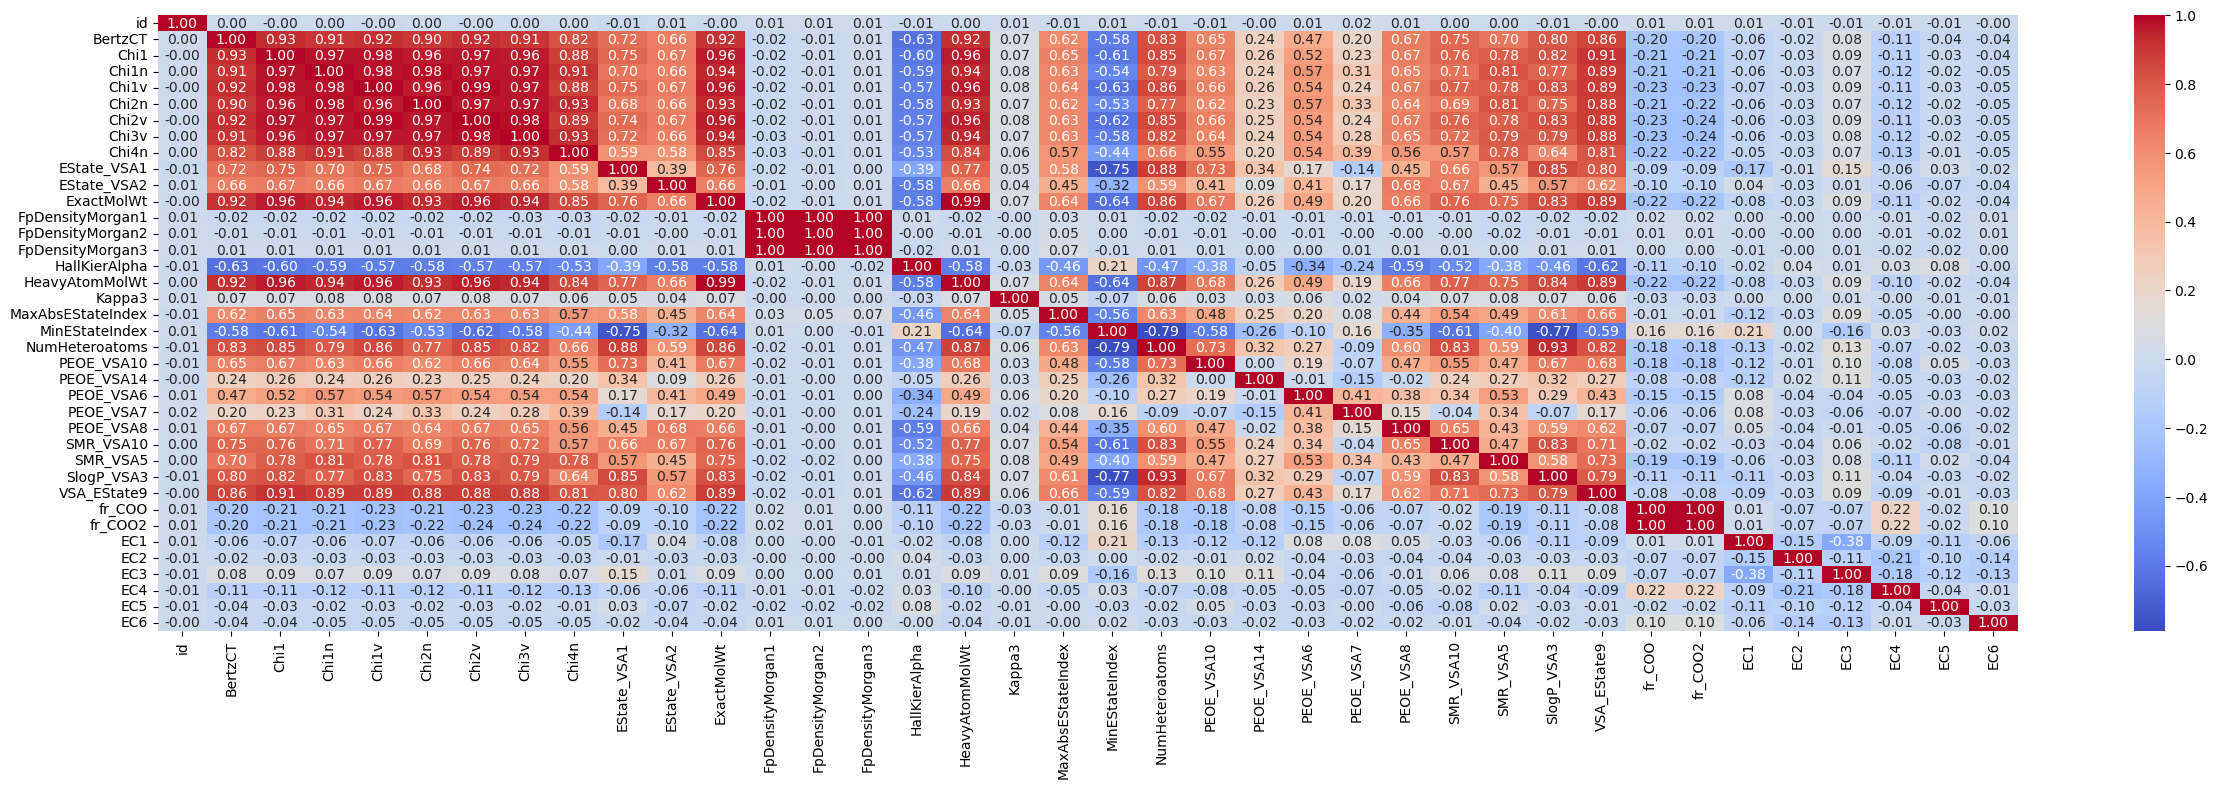

In [19]:
#co-realtion visualization
plt.figure(figsize=(30,8))
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')

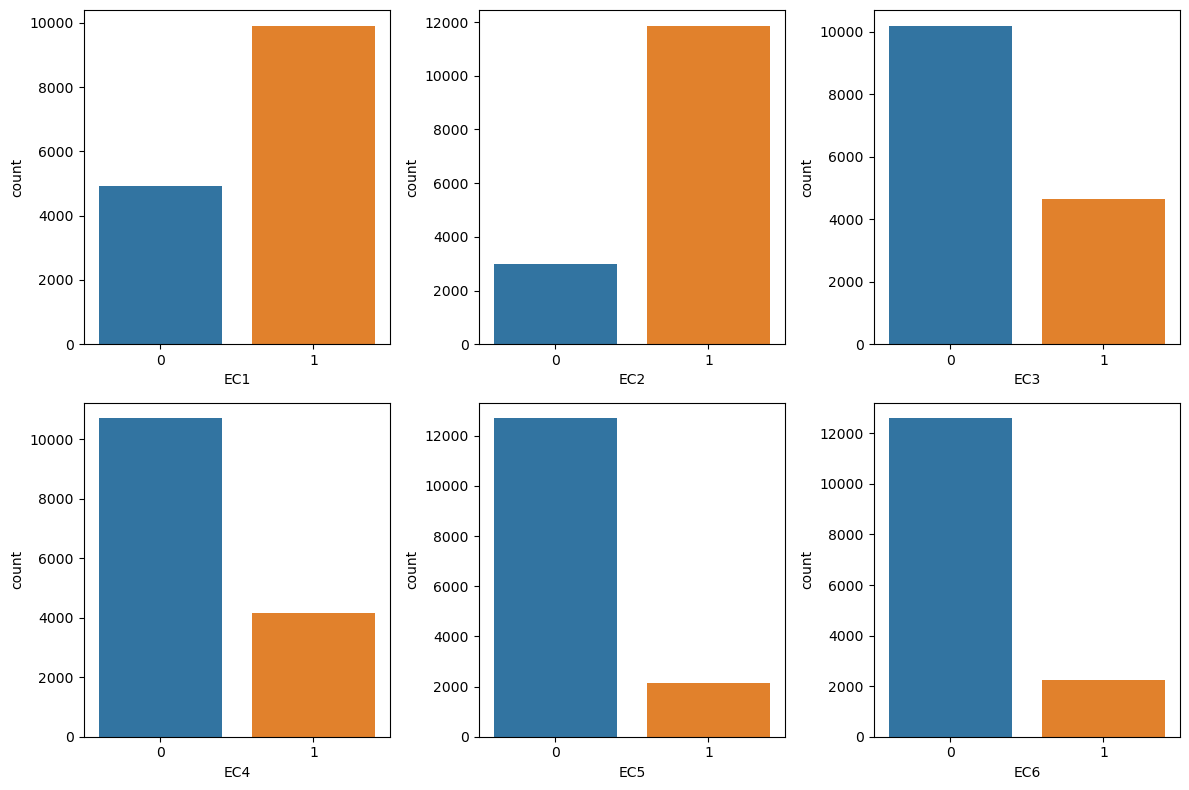

In [20]:
plt.figure(figsize=(12,8))
cols=['EC1','EC2','EC3','EC4','EC5','EC6']
for i in range (len(cols)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=train_df,x=cols[i])
plt.tight_layout()

# Feature Scaling

In [21]:
#StandardScaler
from sklearn.preprocessing import  StandardScaler
scaler= StandardScaler()
train_df=scaler.fit_transform(train_df)
test_df=scaler.fit_transform(test_df)

In [22]:
train_df=pd.DataFrame(train_df,columns=train.columns)
test_df=pd.DataFrame(test_df,columns=test.columns)
train_df
test_df

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,-1.731876,-0.315597,-0.269963,-0.296047,-0.153268,-0.269699,-0.120755,-0.380151,-0.344922,0.651500,...,-0.139008,-0.460653,-0.560728,-0.629944,0.602187,-0.190273,-0.599562,-0.071855,0.798497,0.795625
1,-1.731526,1.682891,0.230503,0.265216,0.227089,0.230280,0.009941,0.152428,0.446155,-0.920146,...,-0.516129,1.344678,4.351855,0.261437,-0.865638,0.669780,-0.925962,-0.211910,-0.679432,-0.681132
2,-1.731175,-0.795626,-0.766207,-0.877711,-0.845803,-0.890099,-0.845144,-0.854779,-0.859653,-0.730459,...,-0.349531,-0.460653,-0.560728,-0.034183,-0.222178,-0.524151,-0.273162,-0.838153,0.798497,0.795625
3,-1.730825,-0.672710,-0.472919,-0.495372,-0.543157,-0.486453,-0.537077,-0.512377,-0.574810,-0.920146,...,1.156617,-0.460653,-0.560728,-0.629944,0.105861,0.040867,-0.599562,-0.766653,-0.679432,-0.681132
4,-1.730475,2.389976,2.339855,2.088255,2.270564,2.150464,2.527202,2.499870,1.459444,1.766759,...,0.138847,0.862290,-0.560728,2.812312,2.919896,0.232152,2.525394,1.799401,-0.679432,-0.681132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,1.730475,-0.496030,-0.750701,-0.653105,-0.668012,-0.677308,-0.682740,-0.630930,-0.755190,-0.152841,...,-0.182932,-0.460653,-0.560728,-0.629944,-0.211991,-0.558049,-0.273162,-0.657614,2.276425,2.272382
9889,1.730825,0.137163,-0.049767,-0.035676,-0.179275,-0.100412,-0.242447,-0.359375,0.011160,-0.920146,...,-0.516129,0.479486,1.293263,1.012009,-0.265065,-0.922128,-0.925962,0.126600,-0.679432,-0.681132
9890,1.731175,-0.254085,-0.414058,-0.526931,-0.412023,-0.427485,-0.238086,-0.416963,-0.318078,0.246260,...,-0.297804,-0.460653,-0.560728,-0.629944,-0.437340,-0.203419,-0.603488,0.041505,-0.679432,-0.681132
9891,1.731526,0.406470,0.124686,0.321001,0.103058,-0.000124,0.141790,0.166505,0.223619,0.255351,...,-0.516129,-0.460653,-0.560728,-0.054965,-0.865638,-0.550452,-0.273162,0.027868,-0.679432,-0.681132


# Model Building - Ada Boost ML Algorithm

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report

In [24]:
train_df_EC1_EC2=train_df.drop(['id','EC1','EC2','EC3','EC4','EC5','EC6'],axis=1)
test_df_EC1_EC2=test_df.drop(['id'],axis=1)

In [25]:
#splitting the train & test data
#X_train_EC1,X_test_EC1,y_train_ec1,y_test_ec1=train_test_split(train_df_EC1_EC2,train['EC1'],test_size=0.2,random_state=42)
# X_train_EC2,X_test_EC2,y_train_ec2,y_test_ec2=train_test_split(train_df_EC1_EC2,train['EC2'],test_size=0.2,random_state=42)
y_train_ec1=train['EC1']
y_train_ec2=train['EC2']

# Traning the model & Predicting the Result

In [26]:
#Defining the model
model_EC1=AdaBoostClassifier(n_estimators=200, learning_rate=0.1)


In [27]:
model_EC1.fit(train_df_EC1_EC2,y_train_ec1)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [28]:
#y_pred_ec1=model_EC1.predict(y_test_ec1)
y_pred_ec1=model_EC1.predict(test_df_EC1_EC2)

In [29]:
# accuracy_score(y_test_ec1,y_pred_ec1)

In [30]:
# print(classification_report(y_test_ec1,y_pred_ec1))

In [31]:
model_EC2=AdaBoostClassifier(n_estimators=200, learning_rate=0.1)

In [32]:
model_EC2.fit(train_df_EC1_EC2,y_train_ec2)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [33]:
#y_pred_ec2=model_EC2.predict(y_test_ec2)
y_pred_ec2=model_EC2.predict(test_df_EC1_EC2)

In [34]:
# accuracy_score(y_test_ec2,y_pred_ec2)

In [35]:
# print(classification_report(y_test_ec2,y_pred_ec2))

# Combining the Prediction - Result

In [36]:
test_id = test['id']

In [37]:
result = pd.DataFrame({
    'id': test_id,
    'EC1': y_pred_ec2,
    'EC2': y_pred_ec2
})

In [38]:
result.head()

,id,EC1,EC2
0,14838,1,1
1,14839,1,1
2,14840,0,0
3,14841,0,0
4,14842,1,1


In [39]:
result.to_csv('result.csv',index=False)